<a href="https://colab.research.google.com/github/simiyupre/Machine-Learning/blob/main/Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Install or update scikit-learn
!pip install -U scikit-learn

# Verify installation
import sklearn
print("scikit-learn version:", sklearn.__version__)
from __future__ import absolute_import,division,print_function,unicode_literals

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import clear_output
from six.moves import urllib

import tensorflow.compat.v2.feature_column as fc
import tensorflow as tf



dftrain = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/train.csv')
dfeval = pd.read_csv('https://storage.googleapis.com/tf-datasets/titanic/eval.csv')
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')



scikit-learn version: 1.6.1


In [ ]:
dftrain.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,female,35.0,1,0,53.1000,First,C,Southampton,n
4,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y


In [ ]:
dfeval.head()

,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,male,35.0,0,0,8.0500,Third,unknown,Southampton,y
1,male,54.0,0,0,51.8625,First,E,Southampton,y
2,female,58.0,0,0,26.5500,First,C,Southampton,y
3,female,55.0,0,0,16.0000,Second,unknown,Southampton,y
4,male,34.0,0,0,13.0000,Second,D,Southampton,y


In [ ]:
dftrain.describe()

,age,n_siblings_spouses,parch,fare
count,627.000000,627.000000,627.000000,627.000000
mean,29.631308,0.545455,0.379585,34.385399
std,12.511818,1.151090,0.792999,54.597730
min,0.750000,0.000000,0.000000,0.000000
25%,23.000000,0.000000,0.000000,7.895800
50%,28.000000,0.000000,0.000000,15.045800
75%,35.000000,1.000000,0.000000,31.387500
max,80.000000,8.000000,5.000000,512.329200


In [ ]:
dfeval.describe()


,age,n_siblings_spouses,parch,fare
count,264.000000,264.000000,264.000000,264.000000
mean,28.720985,0.469697,0.386364,27.023880
std,14.157538,0.978393,0.837775,34.973108
min,0.420000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,7.925000
50%,28.000000,0.000000,0.000000,13.250000
75%,35.250000,1.000000,0.000000,27.900000
max,74.000000,8.000000,6.000000,263.000000


In [ ]:
dftrain.shape


(627, 9)

In [ ]:
y_train.head()

,survived
0,0
1,1
2,1
3,1
4,0


<Axes: >

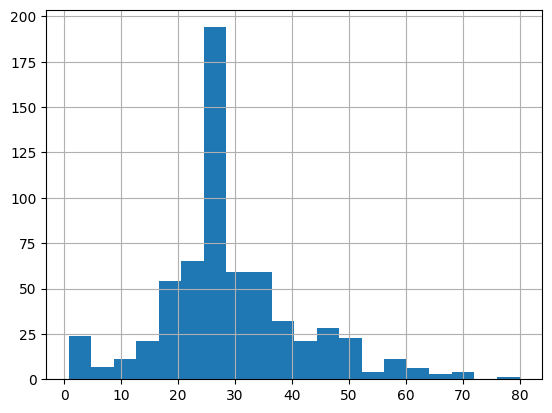

In [ ]:
dftrain.age.hist(bins = 20)

<Axes: ylabel='sex'>

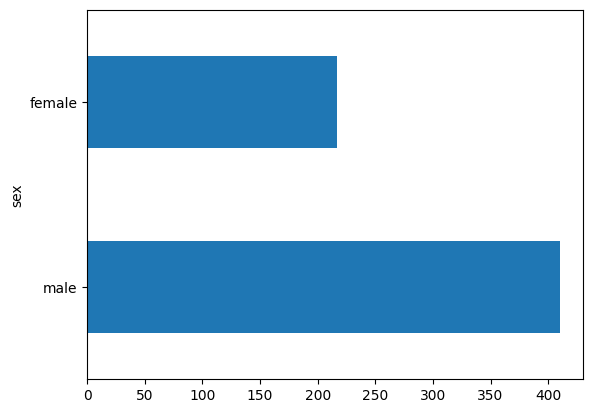

In [ ]:
dftrain.sex.value_counts().plot(kind = 'barh')

<Axes: ylabel='class'>

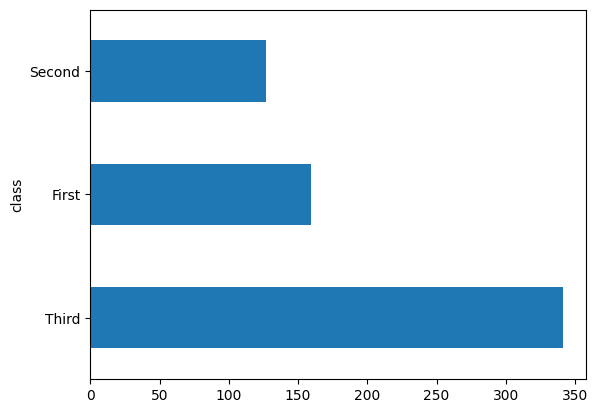

In [ ]:
dftrain['class'].value_counts().plot(kind = 'barh')

Text(0.5, 0, '% survive')

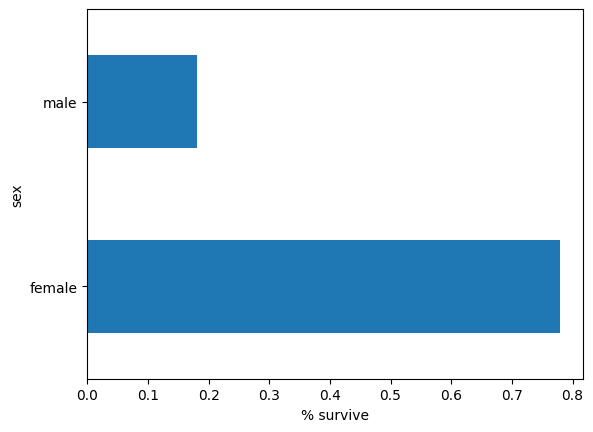

In [ ]:
pd.concat([dftrain,y_train], axis=1).groupby('sex').survived.mean().plot(kind = 'barh').set_xlabel('% survive')

In [ ]:
CATEGORICAL_COLUMNS = ['sex','n_siblings_spouses','parch', 'class','deck','embark_town','alone']

NUMERIC_COLUMNS = ['age','fare']

feature_columns= []
for feature_name in CATEGORICAL_COLUMNS:
  vocabulary = dftrain[feature_name].unique()
  feature_columns.append(tf.feature_column.categorical_column_with_vocabulary_list(feature_name, vocabulary))

for feature_name in NUMERIC_COLUMNS:
  feature_columns.append(tf.feature_column.numeric_column(feature_name,dtype=tf.float32))

def make_input_fn(data_df, label_df,num_epochs=10,shuffle=True,batch_size=32):
  def input_function():
    ds = tf.data.Dataset.from_tensor_slices((dict(data_df),label_df))
    if shuffle:
      ds=ds.batch(batch_size).repeat(num_epochs)
      return ds
    return input_function

train_input_fn = make_input_fn(dftrain, y_train)
eval_input_fn = make_input_fn(dfeval,y_eval,num_epochs=1,shuffle=False)


linear_est = tf.estimator.LinearClassifier(feature_columns=feature_columns)
result = linear_est.evaluate(eval_input_fn)

clear_output();
print(results['accuracy'])



AttributeError: module 'tensorflow' has no attribute 'estimator'